<a href="https://colab.research.google.com/github/nagaraju-urakonda/heart_stroke_prediction/blob/main/heartStrokeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Dataset Information
print("\nDataset Info:")
print(data.info())

# Summary statistics
print("\nDataset Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Preview:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Dataset Info:
<class 'pandas.core.fram

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# 2. Encode Categorical Variables
encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# 3. Scale Numerical Features
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 4. Check for changes
print("\nProcessed Dataset Preview:")
print(data.head())



Processed Dataset Preview:
      id  gender       age  hypertension  heart_disease  ever_married  \
0   9046       1  1.051434             0              1             1   
1  51676       0  0.786070             0              0             1   
2  31112       1  1.626390             0              1             1   
3  60182       0  0.255342             0              0             1   
4   1665       0  1.582163             1              0             1   

   work_type  Residence_type  avg_glucose_level           bmi  smoking_status  \
0          2               1           2.706375  1.001234e+00               1   
1          3               0           2.121559  4.615554e-16               2   
2          2               0          -0.005028  4.685773e-01               2   
3          2               1           1.437358  7.154182e-01               3   
4          3               0           1.501184 -6.357112e-01               2   

   stroke  
0       1  
1       1  
2       1 

In [ ]:
from sklearn.model_selection import train_test_split

# Define feature columns and target column
X = data.drop(columns=['id', 'stroke'])  # Drop 'id' (not useful) and 'stroke' (target)
y = data['stroke']  # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes
print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)


Training set shape (X): (4088, 10)
Testing set shape (X): (1022, 10)
Training set shape (y): (4088,)
Testing set shape (y): (1022,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model with class balancing
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


Confusion Matrix:
[[972   0]
 [ 50   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after resampling:", Counter(y_train_resampled))


Class distribution after resampling: Counter({0: 3889, 1: 3889})


In [ ]:
model = RandomForestClassifier(
    class_weight={0: 1, 1: 5},  # Assign higher weight to the minority class
    random_state=42
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve

# Get probabilities instead of predictions
y_probs = model.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))


Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.33      0.14      0.20        50

    accuracy                           0.94      1022
   macro avg       0.65      0.56      0.58      1022
weighted avg       0.93      0.94      0.93      1022



In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.79      0.88       972
           1       0.16      0.80      0.27        50

    accuracy                           0.79      1022
   macro avg       0.58      0.79      0.57      1022
weighted avg       0.95      0.79      0.85      1022



In [ ]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.17      0.12      0.14        50

    accuracy                           0.93      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.92      0.93      0.92      1022



In [ ]:
from sklearn.metrics import roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc}")


ROC-AUC Score: 0.8042181069958848


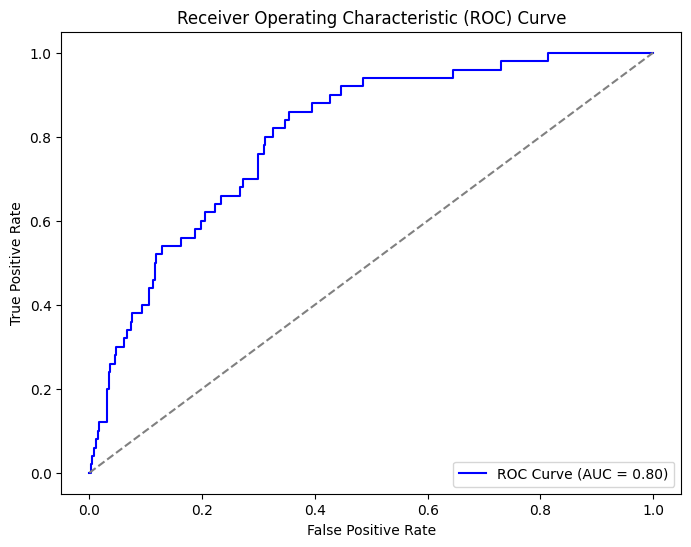

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


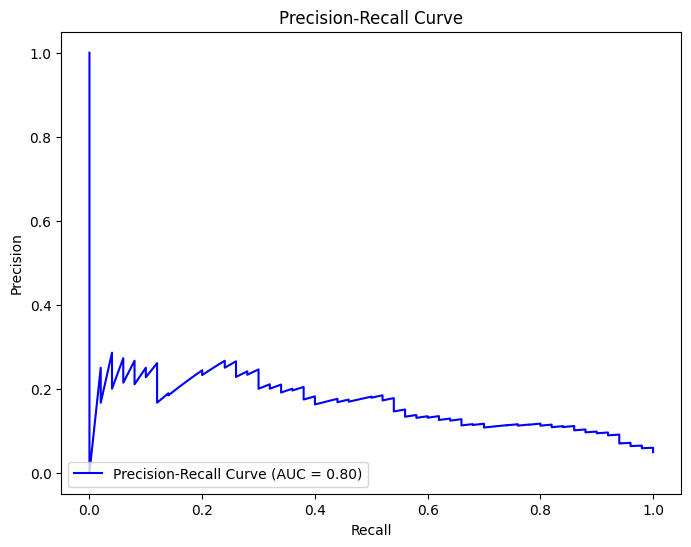

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Precision-Recall Curve (AUC = {auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


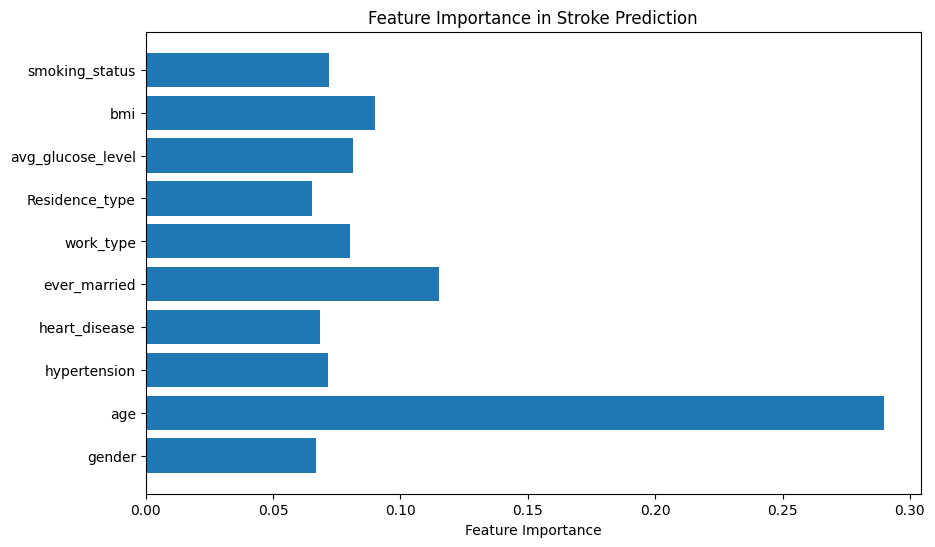

In [ ]:
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Stroke Prediction')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the model file


Saving stroke_prediction_app.pkl.txt to stroke_prediction_app.pkl.txt


In [ ]:
import joblib

# Load the model
model = joblib.load('stroke_prediction_model.pkl')


In [ ]:
# Example input data (ensure this matches the feature names you trained the model on)
age = 21
bmi = 22
glucose = 50
smoking_status = 0  # Example: 1 for "Formerly Smoked"
hypertension = 0
heart_disease = 0
work_type = 2
residence_type = 1
avg_glucose_level = 100.0

# Update input data to include all 10 features
input_data = [[age, bmi, glucose, smoking_status, hypertension, heart_disease, work_type, residence_type, avg_glucose_level, bmi]]

# Make prediction
prediction = model.predict(input_data)

if prediction[0] == 1:
    print("Prediction: High Risk of Stroke")
else:
    print("Prediction: Low Risk of Stroke")


Prediction: Low Risk of Stroke
